In [2]:
import torch
from torch_geometric.datasets import KarateClub
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from torch.nn import Linear
from torch_geometric.nn import GCNConv
from torch_geometric.nn.conv.gcn_conv import gcn_norm


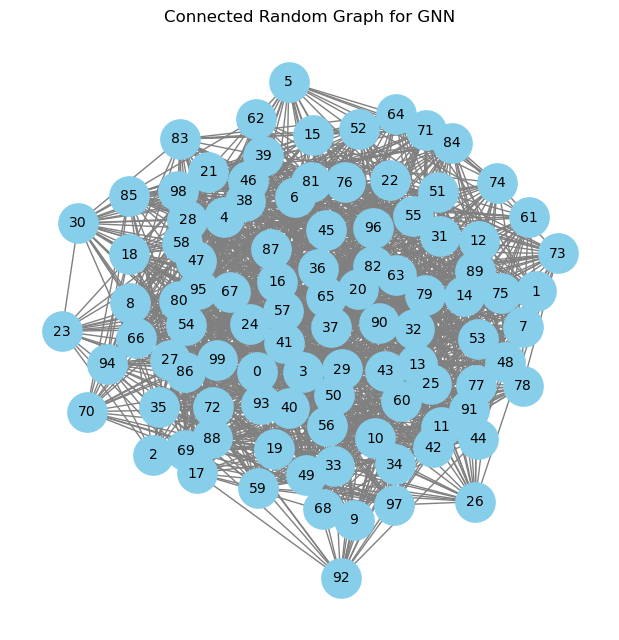

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

n = 100
p = 0.3  
while True:
    G = nx.erdos_renyi_graph(n, p)
    if nx.is_connected(G):
        break  
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color="skyblue", edge_color="gray", node_size=800, font_size=10)
plt.title("Connected Random Graph for GNN")
plt.show()


STC Centrality :  {0: 2214.875, 1: 2164.625, 2: 2010.875, 3: 2357.625, 4: 2203.125, 5: 2038.25, 6: 2264.75, 7: 2226.375, 8: 2188.125, 9: 2029.5, 10: 2272.125, 11: 2170.5, 12: 2195.5, 13: 2202.0, 14: 2331.5, 15: 2137.875, 16: 2200.125, 17: 2137.0, 18: 2201.5, 19: 2182.25, 20: 2317.0, 21: 2205.25, 22: 2251.125, 23: 1978.75, 24: 2314.125, 25: 2216.0, 26: 2078.875, 27: 2260.875, 28: 2183.125, 29: 2292.5, 30: 2159.5, 31: 2088.25, 32: 2320.125, 33: 2208.0, 34: 2175.75, 35: 2209.125, 36: 2387.375, 37: 2261.125, 38: 2160.0, 39: 2243.875, 40: 2337.25, 41: 2362.875, 42: 2180.375, 43: 2178.25, 44: 2307.875, 45: 2294.125, 46: 2143.625, 47: 2121.5, 48: 2240.625, 49: 2332.125, 50: 2271.125, 51: 2222.625, 52: 2185.375, 53: 2294.125, 54: 2157.0, 55: 2193.25, 56: 2362.125, 57: 2390.875, 58: 2193.25, 59: 2246.125, 60: 2146.625, 61: 2079.75, 62: 2047.25, 63: 2339.875, 64: 2077.25, 65: 2331.0, 66: 2113.0, 67: 2269.0, 68: 2103.0, 69: 2147.125, 70: 1983.375, 71: 2171.625, 72: 2295.875, 73: 2104.5, 74: 2112.

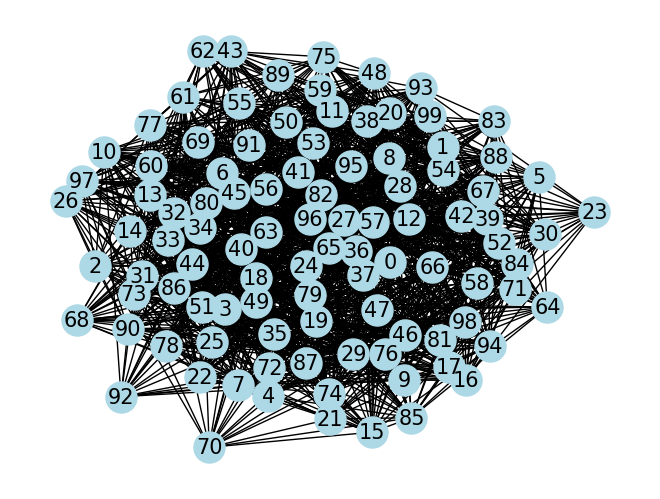

In [6]:
import networkx as nx
from collections import deque
import matplotlib.pyplot as plt

def bfs_upto_level(graph, start_node, max_level):
    visited = set()
    result = []
    queue = deque([(start_node, 0)])
    
    while queue:
        node, level = queue.popleft()
        
        if level > max_level:
            break
        
        if node not in visited:
            visited.add(node)
            result.append((node, level))
            
            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    queue.append((neighbor, level + 1))
    
    return result

def total_triangles_in_bfs(graph, start_node, max_level):
    nodes_in_bfs = bfs_upto_level(graph, start_node, max_level)
    # print(start_node+' has nodes : ',nodes_in_bfs)
    triangles = nx.triangles(graph)  
    total = 0
    
    for node, level in nodes_in_bfs:
        total += triangles[node] / pow(2, level+1) 
    
    return total

def stcCentrality(graph):
    centrality = {}
    for node in graph.nodes():
        centrality[node] = total_triangles_in_bfs(graph, node, 3)  
    return centrality

Gr =G.copy() 

ans=stcCentrality(Gr);
print('STC Centrality : ',ans)

ranked_nodes = sorted(ans.items(), key=lambda x: x[1], reverse=True)

rankings = {}
rank = 1
prev_centrality = None

for node, centrality in ranked_nodes:
    if prev_centrality is not None and centrality != prev_centrality:
        rank += 1
    
    rankings[node] = rank  
    prev_centrality = centrality

# Print the rankings
print("Nodes ranked by STC Centrality:")
print(rankings)

y_true = [0] * len(rankings)

# Assign rankings based on node index
for node, rank in rankings.items():
    y_true[node] = rank

print(y_true)

nx.draw(Gr, with_labels=True, node_color='lightblue', node_size=500, font_size=15)
plt.show()

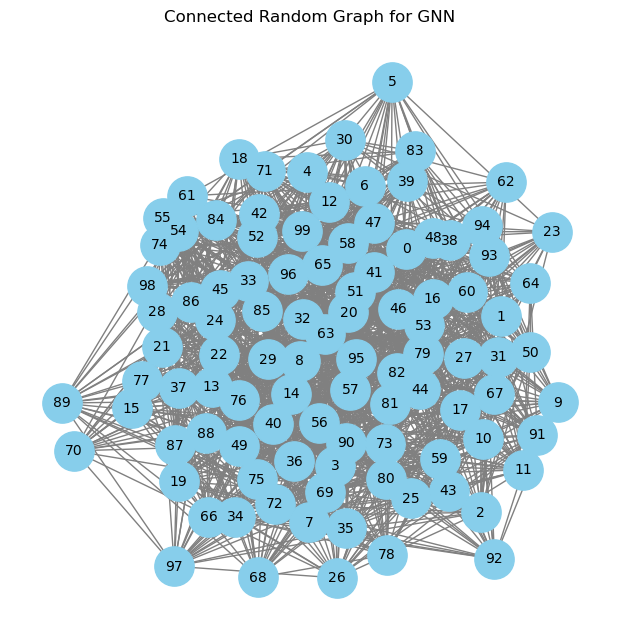

In [8]:
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color="skyblue", edge_color="gray", node_size=800, font_size=10)
plt.title("Connected Random Graph for GNN")
plt.show()

In [10]:
adj = nx.to_numpy_array(G, dtype=int)

triangle_counts = nx.triangles(G)
degrees = dict(G.degree()) 

x = np.array([[triangle_counts[node], degrees[node]] for node in G.nodes()])

print("Adjacency Matrix (adj):")
print(adj)

print("\nFeature Matrix (x) [count_of_triangle, degree]:")
print(x)

Adjacency Matrix (adj):
[[0 1 1 ... 0 0 1]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 1 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]

Feature Matrix (x) [count_of_triangle, degree]:
[[131  31]
 [102  28]
 [ 64  23]
 [199  35]
 [127  29]
 [ 77  23]
 [149  31]
 [147  32]
 [129  31]
 [ 62  22]
 [154  30]
 [114  28]
 [127  30]
 [131  30]
 [183  34]
 [104  26]
 [130  30]
 [102  28]
 [125  27]
 [130  30]
 [193  36]
 [118  29]
 [149  30]
 [ 43  18]
 [169  34]
 [121  30]
 [ 88  25]
 [151  31]
 [110  29]
 [168  35]
 [117  28]
 [ 89  27]
 [194  36]
 [123  28]
 [117  28]
 [131  30]
 [208  38]
 [175  35]
 [117  28]
 [148  31]
 [186  36]
 [192  37]
 [128  29]
 [112  28]
 [175  34]
 [171  36]
 [123  29]
 [ 97  28]
 [139  30]
 [187  34]
 [167  33]
 [145  32]
 [115  28]
 [164  34]
 [114  29]
 [111  28]
 [195  37]
 [221  40]
 [144  33]
 [134  31]
 [109  27]
 [ 80  25]
 [ 69  21]
 [192  36]
 [ 92  24]
 [182  36]
 [ 96  26]
 [152  31]
 [ 83  23]
 [105  28]
 [ 48  19]
 [121  28]
 [182  34]
 [ 9

In [12]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

print(x)

[[0.47826087 0.59090909]
 [0.32065217 0.45454545]
 [0.11413043 0.22727273]
 [0.84782609 0.77272727]
 [0.45652174 0.5       ]
 [0.18478261 0.22727273]
 [0.57608696 0.59090909]
 [0.56521739 0.63636364]
 [0.4673913  0.59090909]
 [0.10326087 0.18181818]
 [0.60326087 0.54545455]
 [0.38586957 0.45454545]
 [0.45652174 0.54545455]
 [0.47826087 0.54545455]
 [0.76086957 0.72727273]
 [0.33152174 0.36363636]
 [0.47282609 0.54545455]
 [0.32065217 0.45454545]
 [0.44565217 0.40909091]
 [0.47282609 0.54545455]
 [0.81521739 0.81818182]
 [0.4076087  0.5       ]
 [0.57608696 0.54545455]
 [0.         0.        ]
 [0.68478261 0.72727273]
 [0.42391304 0.54545455]
 [0.24456522 0.31818182]
 [0.58695652 0.59090909]
 [0.36413043 0.5       ]
 [0.67934783 0.77272727]
 [0.40217391 0.45454545]
 [0.25       0.40909091]
 [0.82065217 0.81818182]
 [0.43478261 0.45454545]
 [0.40217391 0.45454545]
 [0.47826087 0.54545455]
 [0.89673913 0.90909091]
 [0.7173913  0.77272727]
 [0.40217391 0.45454545]
 [0.57065217 0.59090909]


In [14]:
print(x)

[[0.47826087 0.59090909]
 [0.32065217 0.45454545]
 [0.11413043 0.22727273]
 [0.84782609 0.77272727]
 [0.45652174 0.5       ]
 [0.18478261 0.22727273]
 [0.57608696 0.59090909]
 [0.56521739 0.63636364]
 [0.4673913  0.59090909]
 [0.10326087 0.18181818]
 [0.60326087 0.54545455]
 [0.38586957 0.45454545]
 [0.45652174 0.54545455]
 [0.47826087 0.54545455]
 [0.76086957 0.72727273]
 [0.33152174 0.36363636]
 [0.47282609 0.54545455]
 [0.32065217 0.45454545]
 [0.44565217 0.40909091]
 [0.47282609 0.54545455]
 [0.81521739 0.81818182]
 [0.4076087  0.5       ]
 [0.57608696 0.54545455]
 [0.         0.        ]
 [0.68478261 0.72727273]
 [0.42391304 0.54545455]
 [0.24456522 0.31818182]
 [0.58695652 0.59090909]
 [0.36413043 0.5       ]
 [0.67934783 0.77272727]
 [0.40217391 0.45454545]
 [0.25       0.40909091]
 [0.82065217 0.81818182]
 [0.43478261 0.45454545]
 [0.40217391 0.45454545]
 [0.47826087 0.54545455]
 [0.89673913 0.90909091]
 [0.7173913  0.77272727]
 [0.40217391 0.45454545]
 [0.57065217 0.59090909]


In [16]:
edge_index = torch.tensor(np.array(np.nonzero(adj)), dtype=torch.long)
print(type(edge_index)) 

<class 'torch.Tensor'>


In [18]:
# y_true=y_true.tensor(x, dtype=torch.float32)
max_value = np.max(y_true)
max_value

97

In [20]:
y_true = torch.tensor(y_true, dtype=torch.float32)  # Correct way

In [22]:
x = torch.tensor(x, dtype=torch.float32)


In [24]:
# print(type(edge_index))
# print(type(x))
# print(type(y_true))
y_true

tensor([38., 65., 94.,  8., 43., 92., 27., 35., 50., 93., 23., 62., 48., 44.,
        12., 74., 47., 75., 45., 54., 15., 42., 31., 97., 16., 37., 88., 29.,
        53., 21., 67., 85., 14., 41., 59., 40.,  3., 28., 66., 33., 10.,  6.,
        56., 57., 17., 20., 73., 78., 34., 11., 24., 36., 52., 20., 68., 49.,
         7.,  2., 49., 32., 72., 87., 90.,  9., 89., 13., 79., 25., 83., 71.,
        96., 61., 19., 82., 81., 46., 55., 76., 80., 24., 30., 77.,  4., 51.,
        63., 64., 39., 18., 69., 91., 60., 70., 95., 22., 86.,  1.,  5., 84.,
        58., 26.])

In [28]:
import torch
import torch.nn as nn  
import torch.optim as optim
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
import networkx as nx
import numpy as np

# Define the GCN model
class GCN(nn.Module):
    def __init__(self):
        super().__init__()
        self.gcn1 = GCNConv(2, 3)  
        self.gcn2 = GCNConv(3, 4) 
        self.out = nn.Linear(4, max_value+1)  # Adjusted input size

    def forward(self, x, edge_index):
        h = self.gcn1(x, edge_index).relu()
        h = self.gcn2(h, edge_index).relu()  # Added GCN layer
        z = self.out(h)
        return h, z


# Initialize model, loss, and optimizer
model = GCN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.02)

# Accuracy function
def accuracy(pred_y, y):
    return (pred_y == y).sum().item() / len(y)

# Training loop
outputs = []
for epoch in range(5000):
    optimizer.zero_grad()
    h, z = model(x, edge_index) 
    loss = criterion(z, y_true)
    acc = accuracy(z.argmax(dim=1), y_true)
    loss.backward()
    optimizer.step()
    outputs.append(z.argmax(dim=1))
    
    if epoch % 100 == 0:
        
        print(f'Epoch {epoch:>3} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%')
print(outputs[-1])


Epoch   0 | Loss: 4.62 | Acc: 1.00%
Epoch 100 | Loss: 4.15 | Acc: 3.00%
Epoch 200 | Loss: 3.76 | Acc: 8.00%
Epoch 300 | Loss: 3.54 | Acc: 10.00%
Epoch 400 | Loss: 3.38 | Acc: 15.00%
Epoch 500 | Loss: 3.26 | Acc: 14.00%
Epoch 600 | Loss: 3.15 | Acc: 14.00%
Epoch 700 | Loss: 3.02 | Acc: 20.00%
Epoch 800 | Loss: 2.86 | Acc: 19.00%
Epoch 900 | Loss: 2.71 | Acc: 27.00%
Epoch 1000 | Loss: 2.61 | Acc: 36.00%
Epoch 1100 | Loss: 2.52 | Acc: 35.00%
Epoch 1200 | Loss: 2.45 | Acc: 37.00%
Epoch 1300 | Loss: 2.39 | Acc: 47.00%
Epoch 1400 | Loss: 2.34 | Acc: 50.00%
Epoch 1500 | Loss: 2.29 | Acc: 54.00%
Epoch 1600 | Loss: 2.25 | Acc: 51.00%
Epoch 1700 | Loss: 2.20 | Acc: 59.00%
Epoch 1800 | Loss: 2.15 | Acc: 61.00%
Epoch 1900 | Loss: 2.11 | Acc: 63.00%
Epoch 2000 | Loss: 2.07 | Acc: 62.00%
Epoch 2100 | Loss: 2.03 | Acc: 68.00%
Epoch 2200 | Loss: 2.00 | Acc: 67.00%
Epoch 2300 | Loss: 1.97 | Acc: 72.00%
Epoch 2400 | Loss: 1.96 | Acc: 59.00%
Epoch 2500 | Loss: 1.91 | Acc: 75.00%
Epoch 2600 | Loss: 1.89 |

In [26]:
y_true = torch.tensor(y_true, dtype=torch.long)  # Ensure it is Long


/var/folders/y_/bgxf88653s949l9fz6nwpb7r0000gn/T/ipykernel_7957/4182472102.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true, dtype=torch.long)  # Ensure it is Long
